In [17]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import layers, utils, models, callbacks as cb
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [18]:
model = models.load_model('save_at_13.h5')

In [19]:
val = tf.keras.preprocessing.image_dataset_from_directory(
    "validation",
    image_size=(780, 1280),
    batch_size=1,
    shuffle=False
)



Found 36 files belonging to 3 classes.


In [20]:
yytest = []
yypred = []

for xtest, ytest in val:
    # //xtest = np.expand_dims(xtest,axis=0)
    ypred = model(xtest)
    #break
    yytest.append(ytest[0])
    yypred.append(ypred[0])

In [21]:
# yytest = np.array([np.argmax(y) for y in yytest], dtype=np.int32)
yypred = np.array([np.argmax(y) for y in yypred], dtype=np.int32)

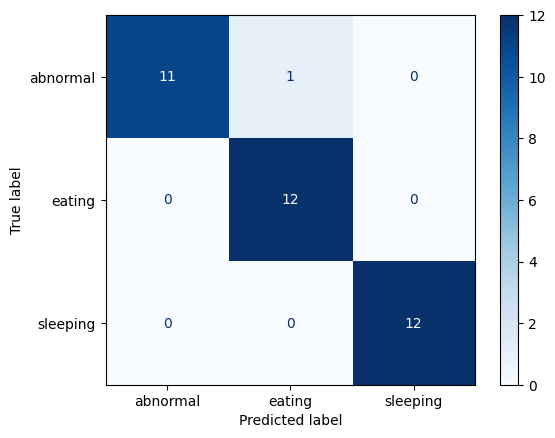

In [22]:
result =  confusion_matrix(yytest, yypred)
disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=["abnormal", "eating","sleeping"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [23]:
# image_size = (540,960)
# batch_size = 32

# # val_ds = tf.keras.preprocessing.image_dataset_from_directory(
# #     "validation",
# #     seed=1337,
# #     image_size=image_size,
# #     batch_size=batch_size,
# # )
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "validation",
#   seed=1337,
#     image_size=image_size,
#     batch_size=batch_size,
# )

In [24]:
# model = models.load_model(r'E:\University\Semester 6\Grad\tile classification 2 - Copy\tile classifciation\testall.h5')


In [25]:
# train_ds = train_ds.unbatch().batch(32, drop_remainder=True)
# train_label = np.concatenate([tf.keras.utils.to_categorical(y, num_classes=5) for x, y in train_ds], axis=0)
# y_prediction = model.predict(train_ds)



In [26]:
# print(train_label.shape)
# print(y_prediction.shape)

In [27]:
# matrix = confusion_matrix(
#     np.argmax(train_label, axis=1),
#     np.argmax(y_prediction, axis=1),
# )
# disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[f"tile{i}" for i in range(1, 6)])
# disp.plot(cmap=plt.cm.Reds)
# plt.show()


In [28]:
result = model.evaluate(val)

36/36 [==============================] - 1s 12ms/step - loss: 9.6547 - accuracy: 0.9722
